In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Analyzing the data

In [2]:
stores_train = pd.read_csv('data/stores_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/stores_train.csv'

NameError: name 'stores_train' is not defined

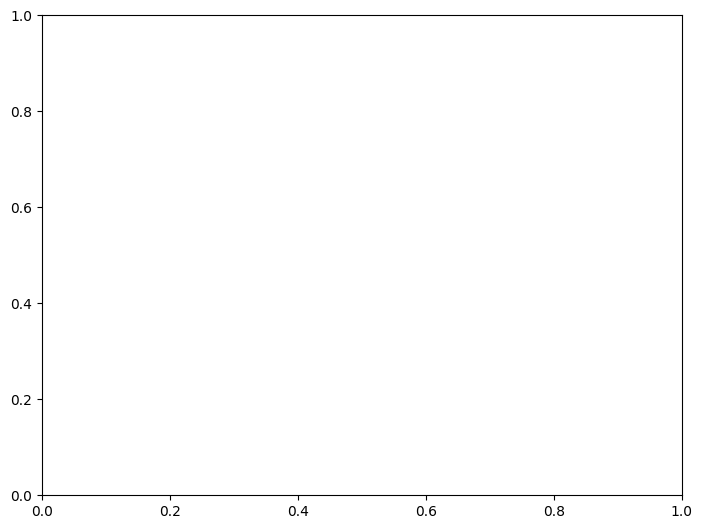

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
horisontal = stores_train.isna().mean().index
vertical = stores_train.isna().mean().values

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()

#Mabye smart to use rows with no NaN values?

In [4]:
sales_channel_names = list(dict.fromkeys(stores_train.sales_channel_name.values))
#print(sales_channel_names)
instances = {i:list(stores_train.sales_channel_name.values).count(i) for i in stores_train.sales_channel_name.values}
#print(instances)
#print(stores_train.revenue)

revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for sales_channel_name in sales_channel_names: #Find revenue for every channel name
    for i in range(len(stores_train.revenue)):
        if stores_train.sales_channel_name.values[i] == sales_channel_name:
            revenue_per_channel_name[sales_channel_name] += stores_train.revenue[i]

#print(revenue_per_channel_name)

mean_revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for key in revenue_per_channel_name.keys(): #Find mean revenue for every channel name
    mean_revenue_per_channel_name[key] = revenue_per_channel_name[key] / instances[key]

print(mean_revenue_per_channel_name)



NameError: name 'stores_train' is not defined

In [ ]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])

#print(len(list(mean_revenue_per_channel_name.keys())))

vertical = list(mean_revenue_per_channel_name.values())[:30]
horisontal = list(mean_revenue_per_channel_name.keys())[:30]

#print(horisontal)
#print(vertical)

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()